In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    print(f'accuracy: {accuracy: .4f}, precision: {precision: .4f}, recall: {recall: .4f}, f1: {f1: .4f}, roc_auc: {roc_auc: .4f}')


In [4]:
X = diabetes_data.iloc[: , :-1]
y = diabetes_data.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[88 12]
 [23 31]]
accuracy:  0.7727, precision:  0.7209, recall:  0.5741, f1:  0.6392, roc_auc:  0.7919


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

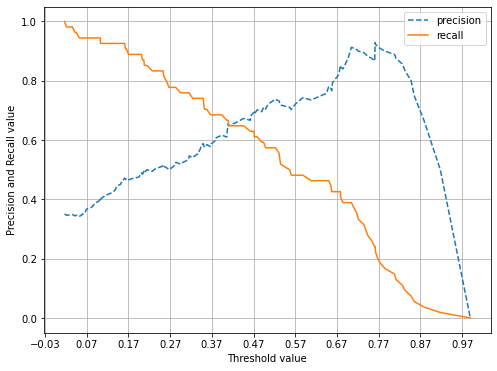

In [6]:
precision_recall_curve_plot(y_test, pred_proba)

In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

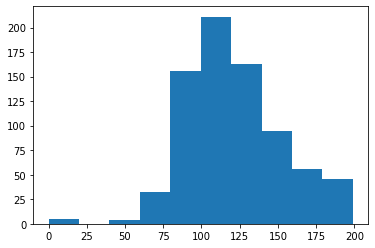

In [12]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [39]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} zero_count: {zero_count}, zero_count / total_count: {100 * zero_count / total_count: .2f}%\n')

Glucose zero_count: 0, zero_count / total_count:  0.00%

BloodPressure zero_count: 0, zero_count / total_count:  0.00%

SkinThickness zero_count: 0, zero_count / total_count:  0.00%

Insulin zero_count: 0, zero_count / total_count:  0.00%

BMI zero_count: 0, zero_count / total_count:  0.00%



In [19]:
mean_zero_feature = diabetes_data[zero_features].mean()
print(mean_zero_feature)
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_feature)

Glucose          121.681605
BloodPressure     72.254807
SkinThickness     26.606479
Insulin          118.660163
BMI               32.450805
dtype: float64


In [20]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

confusion matrix
[[90 10]
 [21 33]]
accuracy:  0.7987, precision:  0.7674, recall:  0.6111, f1:  0.6804, roc_auc:  0.8433


In [37]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
       binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
       custom_predict = binarizer.transform(pred_proba_c1)
       print('threshold: ', custom_threshold)
       get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [41]:
thresholds = np.arange(0.3, 0.51, 0.03)
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)


threshold:  0.3
confusion matrix
[[67 33]
 [11 43]]
accuracy:  0.7143, precision:  0.5658, recall:  0.7963, f1:  0.6615, roc_auc:  0.8433
threshold:  0.32999999999999996
confusion matrix
[[72 28]
 [12 42]]
accuracy:  0.7403, precision:  0.6000, recall:  0.7778, f1:  0.6774, roc_auc:  0.8433
threshold:  0.35999999999999993
confusion matrix
[[76 24]
 [15 39]]
accuracy:  0.7468, precision:  0.6190, recall:  0.7222, f1:  0.6667, roc_auc:  0.8433
threshold:  0.3899999999999999
confusion matrix
[[78 22]
 [16 38]]
accuracy:  0.7532, precision:  0.6333, recall:  0.7037, f1:  0.6667, roc_auc:  0.8433
threshold:  0.4199999999999999
confusion matrix
[[84 16]
 [18 36]]
accuracy:  0.7792, precision:  0.6923, recall:  0.6667, f1:  0.6792, roc_auc:  0.8433
threshold:  0.44999999999999984
confusion matrix
[[85 15]
 [18 36]]
accuracy:  0.7857, precision:  0.7059, recall:  0.6667, f1:  0.6857, roc_auc:  0.8433
threshold:  0.4799999999999998
confusion matrix
[[88 12]
 [19 35]]
accuracy:  0.7987, precisio

In [42]:
binarizer = Binarizer(threshold=0.48)

pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1, 1))

get_clf_eval(y_test, pred_th_048, pred_proba[:, 1])

confusion matrix
[[88 12]
 [19 35]]
accuracy:  0.7987, precision:  0.7447, recall:  0.6481, f1:  0.6931, roc_auc:  0.8433
